In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import torch
from torch_geometric.nn import conv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gae import get_vanilla_model
from data import One_RNA_Dataset, PairDataset
from utils import plot_correlation_prediction

In [33]:
data = One_RNA_Dataset("../data/test")

In [34]:
pair_dataset = PairDataset(data, data, sample=True, remove_random=True)

/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
 43%|████▎     | 27/63 [00:00<00:00, 39.39it/s]

100%|██████████| 63/63 [00:01<00:00, 36.72it/s]


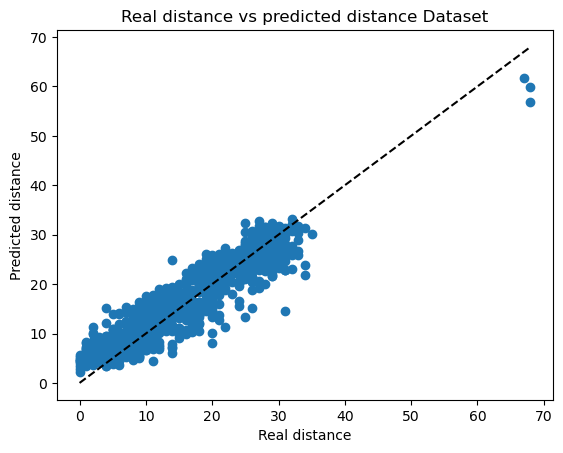

In [35]:
# Load model

model = get_vanilla_model(64, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv64/best_model.pt"))
fig = plot_correlation_prediction(model, pair_dataset, "Dataset")

  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:01<00:00, 43.98it/s]


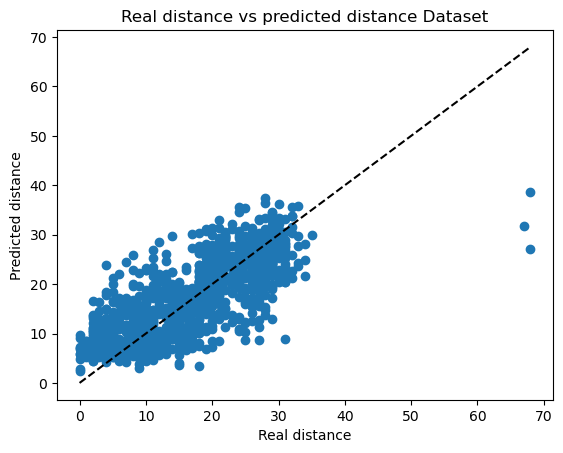

In [36]:
# Load model

model = get_vanilla_model(32, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv/best_model.pt"))
fig = plot_correlation_prediction(model, pair_dataset, "Dataset")

 62%|██████▏   | 39/63 [00:01<00:00, 40.45it/s]

100%|██████████| 63/63 [00:02<00:00, 29.40it/s]


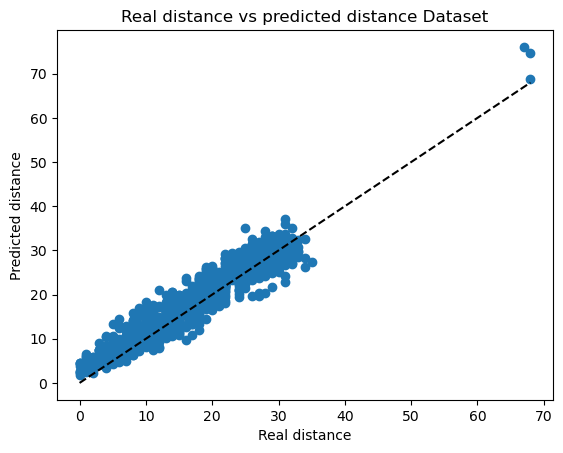

In [37]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256/best_model.pt"))
fig, real_distancesL2 , predicted_distancesL2 = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [38]:
errorL2 = np.abs(real_distancesL2 - predicted_distancesL2)

In [39]:
print("Mean error: ", np.mean(errorL2))
print("Median error: ", np.median(errorL2))
print("Max error: ", np.max(errorL2))
print("Min error: ", np.min(errorL2))
print("Variation: ", np.var(errorL2))

Mean error:  2.5548189
Median error:  2.2968478
Max error:  9.964027
Min error:  0.0014038086
Variation:  3.1939027


 21%|██        | 13/63 [00:00<00:02, 24.56it/s]

100%|██████████| 63/63 [00:02<00:00, 28.97it/s]


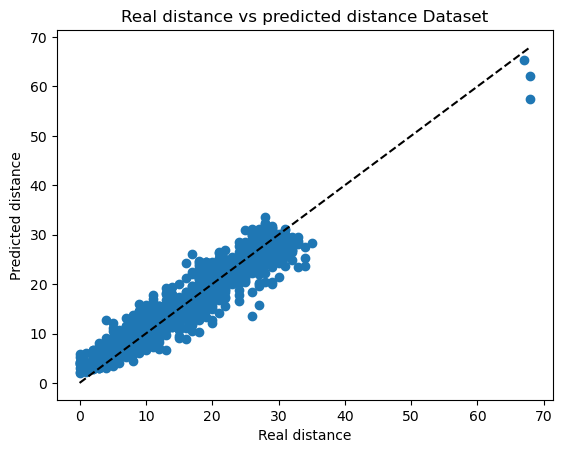

In [41]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256L1/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [42]:
error = np.abs(real_distances - predicted_distances)

In [43]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  2.3575742
Median error:  2.000607
Max error:  12.505351
Min error:  0.008148432
Variation:  3.339561


/tmp/ipykernel_2477719/1653742877.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(error, shade=True, color="r", label="L1")
/tmp/ipykernel_2477719/1653742877.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errorL2, shade=True, color="b", label="L2")


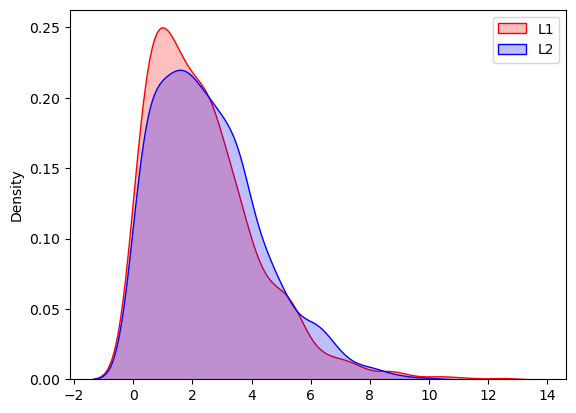

In [45]:
sns.kdeplot(error, shade=True, color="r", label="L1")
sns.kdeplot(errorL2, shade=True, color="b", label="L2")
plt.legend()

/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


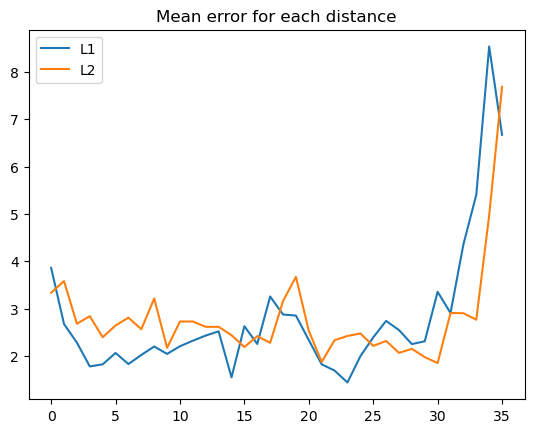

In [46]:
# Mean error for each distance
mean_error = np.zeros(50)
for i in range(50):
    mean_error[i] = np.mean(error[real_distances == i])
plt.plot(mean_error, label="L1")
# Mean error for each distance
mean_errorL2 = np.zeros(50)
for i in range(50):
    mean_errorL2[i] = np.mean(errorL2[real_distancesL2 == i])
plt.plot(mean_errorL2, label="L2")
plt.legend()
plt.title("Mean error for each distance")
plt.show()


/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
100%|██████████| 63/63 [00:01<00:00, 37.27it/s]


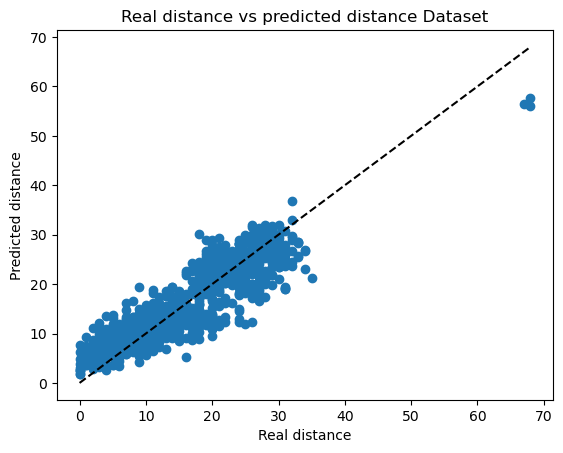

In [47]:
# Load model

model = get_vanilla_model(256, conv.GCNConv)
model.load_state_dict(torch.load("../models/gcnconv256L1/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [48]:
error = np.abs(real_distances - predicted_distances)

In [49]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  3.2282836
Median error:  2.7041688
Max error:  13.708191
Min error:  0.009693146
Variation:  5.92553
